# Trabalho EIACD

Trabalho realizado por: Catarina Monteiro (202105279) e Alexandre Carneiro (202107858)

### Índice:
 1. [Introdução](#Introdução)
 2. [Bibliotecas](#Bibliotecas)
 3. [Problema/Objetivo](#Problema/Objetivo)
 4. [Passo 1: Verificação dos dados](#Passo-1:-Verificação-dos-dados)
 5. [Passo 2: Organização os dados](#Passo-2:-Organização-os-dados)
 6. [Passo 3: Treino e testes](#Passo-3:-Treino-e-testes)
     - [Decision tree](#Decision-tree)
     - [K-NN](#K-NN)
 9. [Passo 4: Comparação de métodos](#Passo-4:-Comparação-de-métodos)
 10. [Conclusão](#Conclusão)

## Introdução
[voltar ao início](#Índice:)

Este trabalho foi realizado no âmbito da cadeira de Elementos da Inteligência Artificial e Ciência de Dados (mais expecificamente: Ciência de Dados) lecionada pelo professor Pedro Gabriel Dias Ferreira.
Neste notebook será apresentado, em Python, a análise de um dataset de jogos.

## Bibliotecas
[voltar ao início](#Índice:)

Neste notebook utiliza diversas bibliotecas padrão do [Anaconda Python distribution](http://continuum.io/downloads). As principais bibliotecas usadas neste trabalho foram:
* **NumPy**: uma biblioteca para a linguagem de programação Python, que suporta o processamento de grandes, multi-dimensionais arranjos e matrizes, juntamente com uma grande coleção de funções matemáticas de alto nível para operar sobre estas matrizes.
* **pandas**:  é uma biblioteca de software criada para a linguagem Python para manipulação e análise de dados. Em particular, oferece estruturas e operações para manipular tabelas numéricas e séries temporais.
* **matplotlib**: uma biblioteca de software para criação de gráficos e visualizações de dados em geral, feita para e da linguagem de programação Python e sua extensão de matemática NumPy. 
* **scikit-learn**: uma biblioteca Python de código aberto que implementa uma variedade de machine-learning, pré-processamento, crossig validation e visualização algoritmos usando uma interface unificada.
* **Seaborn**: uma biblioteca de visualização de dados Python baseada no matplotlib. Fornece uma interface de alto nível para desenhar gráficos estatísticos atraentes e informativos.

Para realizar a [instalação do Anaconda](https://www.anaconda.com/products/distribution) carregue na hiperligação e faça o download.

## Problema/Objetivo
[voltar ao início](#Índice:)

Este trabalho consiste em, após analisar um dataset de jogos, conseguir aferir/prever se a avaliação dada pelo utilizador é má, mediocre, bom ou muito bom. 
O dataset apresenta as seguintes categorias para análise:

* **Identifier**: Id
* **Categorical**: Name  
* **Categorical**: Category
* **Numerical**: Number of DLCs
* **Numerical**: Number of expansions
* **Numerical**: Release year
* **Numerical**: Follows
* **Boolean**: In a franchise 
* **String**: Genre
* **String**: Platform
* **String**: Companies
* **Numerical**: Average users score (0 to 100)
* **Categorical**: Average users rating (bad, mediocre, good or great). Each class represents ~25% of the
    data
* **Numerical**: Number of reviews by users
* **String**: Summary

Este problema insere-se na categoria supervised learning - classificação do machine learning.
Os algoritmos utilizados na resolução do mesmo serão a decision tree (usando e comparando gini e entropy) e o K-NN.

## Passo 1: Verificação dos dados
[voltar ao início](#Índice:)

Leitura dos dados:

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sb

os.chdir(r"C:\Users\catar\Downloads\video_games.csv") #mudar para o diretório onde estão os dados
df=pd.read_csv("video_games.csv",sep=",") #as colunas sao separadas onde estão as vírgulas no ficheiro
df.head() #mostrar as primeiras linhas do dataset

,id,name,category,n_dlcs,n_expansions,year,follows,in_franchise,genres,companies,platforms,user_score,user_rating,n_user_reviews,summary
0,1020,Grand Theft Auto V,main_game,0,0,2013,1766,True,"Shooter, Adventure","Rockstar North, Rockstar Games, Take-Two Inter...","PC (Microsoft Windows), PlayStation 3, Xbox 36...",90.202388,great,3369,Grand Theft Auto V is a vast open world game s...
1,1942,The Witcher 3: Wild Hunt,main_game,4,2,2015,1516,True,"Role-playing (RPG), Adventure","WB Games, Bandai Namco Entertainment, cdp.pl, ...","PC (Microsoft Windows), PlayStation 4, Xbox On...",95.169577,great,2997,"RPG and sequel to The Witcher 2 (2011), The Wi..."
2,472,The Elder Scrolls V: Skyrim,main_game,3,0,2011,1046,False,"Role-playing (RPG), Adventure","Bethesda Game Studios, Bethesda Softworks","PC (Microsoft Windows), PlayStation 3, Xbox 360",87.508504,great,2567,Skyrim reimagines and revolutionizes the open-...
3,72,Portal 2,main_game,3,0,2011,963,True,"Shooter, Platform, Puzzle, Adventure","Valve Corporation, Electronic Arts","Linux, PC (Microsoft Windows), PlayStation 3, ...",91.650705,great,2544,"Sequel to the acclaimed Portal (2007), Portal ..."
4,71,Portal,main_game,0,0,2007,894,True,"Shooter, Platform, Puzzle","Valve Corporation, EA","Linux, PC (Microsoft Windows), PlayStation 3, ...",86.931758,great,2297,"Waking up in a seemingly empty laboratory, the..."


Verificar se existem dados em falta (espaços em branco):

In [106]:
nullid = df["id"].isnull().sum() #nullid = df["id"]- selecionar a coluna; .isnull() - verifica se há valores nulos ou valores em falta; .sum() - soma quantos valores em falta há
nullname = df["name"].isnull().sum()
nullcat = df["category"].isnull().sum()
nullndlcs = df["n_dlcs"].isnull().sum()
nullinexpan = df["n_expansions"].isnull().sum()
nullyear = df["year"].isnull().sum()
nullfollows = df["follows"].isnull().sum()
nullfranch = df["in_franchise"].isnull().sum()
nullgenres = df["genres"].isnull().sum()
nullcomp = df["companies"].isnull().sum()
nullplat = df["platforms"].isnull().sum()
nulluserscore = df["user_score"].isnull().sum()
nulluserrating = df["user_rating"].isnull().sum()
nullreviews = df["n_user_reviews"].isnull().sum()
nullsum = df["summary"].isnull().sum()
print(nullid)
print(nullname)
print(nullcat)
print(nullndlcs)
print(nullinexpan)
print(nullyear)
print(nullfollows)
print(nullfranch)
print(nullgenres) #há 21 dados em falta
print(nullcomp) #há 43 dados em falta
print(nullplat)
print(nulluserscore)
print(nulluserrating)
print(nullreviews)
print(nullsum) #há 8 dados em falta

0
0
0
0
0
0
0
0
21
43
0
0
0
0
8


In [107]:
#Todas as linhas com valores em falta
subset=df[(df["genres"].isnull() == True)|(df["companies"].isnull() == True)|(df["summary"].isnull() == True)]
subset

,id,name,category,n_dlcs,n_expansions,year,follows,in_franchise,genres,companies,platforms,user_score,user_rating,n_user_reviews,summary
1542,45181,Mass Effect Trilogy,bundle,0,0,2012,19,False,"Shooter, Role-playing (RPG)",NaN,"PlayStation 3, Xbox 360",98.110789,great,63,Experience all three award winning Mass Effect...
1607,2940,Killer Is Dead,main_game,0,0,2013,24,False,NaN,"Grasshopper Manufacture, XSEED Games","PC (Microsoft Windows), PlayStation 3, Xbox 36...",56.868247,good,61,Get ready for some seriously stylish action fr...
1992,14389,Friday the 13th: The Game,main_game,0,0,2017,49,True,NaN,"Illfonic, Gun Media, Black Tower Studios, Blac...","PC (Microsoft Windows), PlayStation 4, Xbox On...",68.514517,good,46,Friday the 13th: The Game is a third-person ho...
2200,2283,Defense of the Ancients,mod,0,0,2003,20,False,"Role-playing (RPG), Tactical",NaN,PC (Microsoft Windows),90.833814,great,41,Defense of the Ancients (DotA) is a multiplaye...
2478,2623,Shinobi III: Return of the Ninja Master,main_game,0,0,1993,10,False,"Platform, Hack and slash/Beat 'em up",NaN,"Linux, Wii, PC (Microsoft Windows), Sega Mega ...",79.511290,great,35,"Shinobi III: Return of the Ninja Master, relea..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5543,39034,Assassin's Creed: Origins - Deluxe Edition,main_game,0,0,2017,7,False,"Role-playing (RPG), Adventure",NaN,"PC (Microsoft Windows), PlayStation 4, Xbox One",90.064197,great,11,Over 50 E3 Awards & Nominations ASSASSIN’S CR...
5552,27807,Zoo Tycoon: Dinosaur Digs,expansion,0,0,2002,3,True,"Simulator, Strategy",NaN,PC (Microsoft Windows),80.045738,great,11,Create prehistoric pandemonium while adding di...
5585,20008,Muramasa Rebirth,main_game,0,0,2013,5,False,NaN,Aksys Games,PlayStation Vita,80.341417,great,11,From master video game developer Vanillaware c...
5652,10759,F-22 Lightning II,main_game,0,0,1996,2,False,"Shooter, Simulator",NovaLogic,PC (Microsoft Windows),71.797435,good,11,NaN


In [108]:
#verificar todas as avaliações quanto ao jogo que tem valores em falta e fazer a moda com as linhas que têm valores
subset3=pd.DataFrame()
a=0
for i in subset["name"]:
    for j in df["name"]:
        if i == j:
            a=a+1
            subset3 = pd.concat([df[df["name"]==j],subset3])
    print (a)
    if a > 1:
        subset3
    a=0
    

1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [109]:
#verificar todas as avaliações quanto ao jogo que tem valores em falta e fazer a moda com as linhas que têm valores
subset1=pd.DataFrame()
i="Chrono Trigger"
for j in df["name"]:
    if i == j:
        subset1 = pd.concat([df[df["name"]==j],subset1])
subset1.drop_duplicates()

,id,name,category,n_dlcs,n_expansions,year,follows,in_franchise,genres,companies,platforms,user_score,user_rating,n_user_reviews,summary
81,1802,Chrono Trigger,main_game,0,0,1995,396,True,Role-playing (RPG),Square,"Wii, PC (Microsoft Windows), PlayStation, Play...",93.994940,great,853,"In this turn-based Japanese RPG, young Crono m..."
3568,20398,Chrono Trigger,expanded_game,0,0,2008,2,False,NaN,Square Enix,Nintendo DS,95.184238,great,21,When a newly developed teleportation device ma...


In [110]:
#moda dos valores em falta
subset1["genres"]=subset1["genres"].fillna(subset1["genres"].mode()[0])
subset1.drop_duplicates()
df.loc[df["id"]==20398].drop
df = pd.concat([(subset1.loc[subset1["id"]== 20398]),df])

In [111]:
#verificar todas as avaliações quanto ao jogo que tem valores em falta e fazer a moda com as linhas que têm valores
subset2=pd.DataFrame()
i="Gauntlet"
for j in df["name"]:
    if i == j:
        subset2 = pd.concat([df[df["name"]==j],subset2])
subset2.drop_duplicates()

,id,name,category,n_dlcs,n_expansions,year,follows,in_franchise,genres,companies,platforms,user_score,user_rating,n_user_reviews,summary
2106,7293,Gauntlet,main_game,0,0,2014,12,False,"Role-playing (RPG), Hack and slash/Beat 'em up...","WB Games, Arrowhead Game Studios","PC (Microsoft Windows), PlayStation 4",65.578392,good,43,The classic Gauntlet 4-player co-op action gam...
3185,3502,Gauntlet,main_game,1,0,1985,5,False,"Hack and slash/Beat 'em up, Arcade","Atari Games Corporation, U.S. Gold, Atari Game...","PC DOS, Mac, Commodore C64/128, Amstrad CPC, Z...",70.124277,good,25,"The players, up to four at once in the arcade ..."
4829,7294,Gauntlet,main_game,0,0,1987,1,False,"Hack and slash/Beat 'em up, Arcade","Tengen, Nintendo of America, Atari Games Corpo...","Nintendo Entertainment System (NES), Arcade",66.790158,good,14,NaN


In [112]:
#moda dos valores em falta
subset2["summary"]=subset2["summary"].fillna(subset2["summary"].mode()[0])
subset2.drop_duplicates()
df.loc[df["id"]==7294].drop
df = pd.concat([(subset2.loc[subset2["id"]== 7294]),df])

Sabendo a moda de cada coluna, colocamos esse valor nos locais em falta uma vez que são dados categóricos (identificados anteriormente): 

In [113]:
#inserir moda nas restantes linhas

df["genres"]=df["genres"].fillna(df["genres"].mode()[0])
df["summary"]=df["summary"].fillna(df["summary"].mode()[0])
df["companies"]=df["companies"].fillna(df["companies"].mode()[0])

In [114]:
#apenas para verificação
nullgenres = df["genres"].isnull().sum()
nullcomp = df["companies"].isnull().sum()
nullsum = df["summary"].isnull().sum()
print(nullgenres) #já não há valores nulos, passo acima concluido com sucesso :)
print(nullcomp)
print(nullsum) 

0
0
0


## Passo 2: Organização os dados
[voltar ao início](#Índice:)

Passar dados para números:

In [115]:
from sklearn import preprocessing

destino=df["user_rating"]

le=preprocessing.LabelEncoder()
category=df["category"]=le.fit_transform(df.category.values)
franchise=df["in_franchise"]=le.fit_transform(df.in_franchise.values)
genres=df["genres"]=le.fit_transform(df.genres.values)
companies=df["companies"]=le.fit_transform(df.companies.values)
platforms=df["platforms"]=le.fit_transform(df.platforms.values)
df.drop("summary" ,axis=1,inplace=True) #retirar coluna summary
df.drop("user_score" ,axis=1,inplace=True)
df.drop_duplicates()

,id,name,category,n_dlcs,n_expansions,year,follows,in_franchise,genres,companies,platforms,user_rating,n_user_reviews
4829,7294,Gauntlet,6,0,0,1987,1,0,105,3728,386,good,14
3568,20398,Chrono Trigger,3,0,0,2008,2,0,427,3434,373,great,21
0,1020,Grand Theft Auto V,6,0,0,2013,1766,1,517,3001,735,great,3369
1,1942,The Witcher 3: Wild Hunt,6,4,2,2015,1516,1,428,4150,782,great,2997
2,472,The Elder Scrolls V: Skyrim,6,3,0,2011,1046,0,428,492,671,great,2567
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819,721,Freedom Force vs. The 3rd Reich,6,0,0,2005,5,0,486,1845,413,great,11
5820,682,Europa Universalis II,6,0,0,2001,11,0,404,3526,451,great,11
5821,628,Championship Manager: Season 03/04,6,0,0,2003,1,0,678,1169,451,good,11
5822,317,SWAT 4: The Stetchkov Syndicate,4,0,0,2006,8,1,641,1847,413,good,11


In [116]:
dados = pd.DataFrame(list(zip(df["category"],df["n_dlcs"],df["n_expansions"],df["year"],df["follows"],df["in_franchise"],df["genres"],df["companies"],df["platforms"],df["n_user_reviews"])))

Dividir os dados em dados para teste e dados para treino:

In [117]:
from sklearn.model_selection import train_test_split
dados_train,dados_test,destino_train,destino_test=train_test_split(dados,destino,random_state=25)

## Passo 3: Treino e testes
[voltar ao início](#Índice:)

### Decision tree
[voltar ao início](#Índice:)

Escolha da melhor profundidade:

8
0.6323731138545954


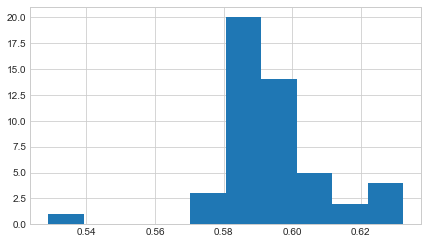

In [118]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

valor = 0
n=0
listai=[]
listavalor1=[]
for i in range(1,50):
    tree = DecisionTreeClassifier(criterion="gini",max_depth=i)

    tree.fit(dados_train, destino_train)

    valor1=tree.score(dados_test, destino_test)
    listai.append(i)
    listavalor1.append(valor1)
    if valor1>valor:
        n=i
        valor = valor1

print(n)
print(valor)
treegini=DecisionTreeClassifier(criterion="gini",max_depth=n)
treegini.fit(dados_test, destino_test)
plt.hist(listavalor1)
previsao_dados=treegini.predict(dados_test)

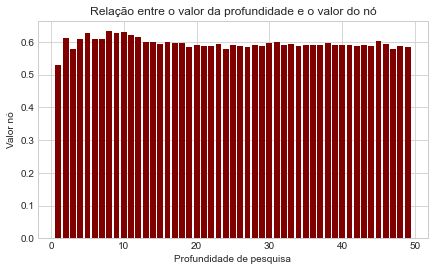

In [119]:
plt.bar(listai,listavalor1,color="maroon",width=0.8)
plt.xlabel("Profundidade de pesquisa")
plt.ylabel("Valor nó")
plt.title("Relação entre o valor da profundidade e o valor do nó")
plt.show()

Para criterion = "entropy":

7
0.6262002743484225


(array([ 1.,  0.,  0.,  0.,  1., 11., 17., 13.,  3.,  3.]),
 array([0.5288, 0.5385, 0.5483, 0.558 , 0.5678, 0.5775, 0.5872, 0.597 ,
        0.6067, 0.6165, 0.6262]),
 <BarContainer object of 10 artists>)

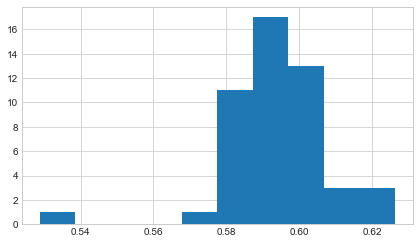

In [120]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier


valor3 = 0
a=0
listaj=[]
listavalor2=[]
for j in range(1,50):
    tree3 = DecisionTreeClassifier(criterion="entropy",max_depth=j)

    tree3.fit(dados_train, destino_train)

    valor2=tree3.score(dados_test, destino_test)
    listaj.append(j)
    listavalor2.append(valor2)
    if valor2>valor3:
        a=j
        valor3 = valor2

print(a)
print(valor3)

plt.hist(listavalor2)

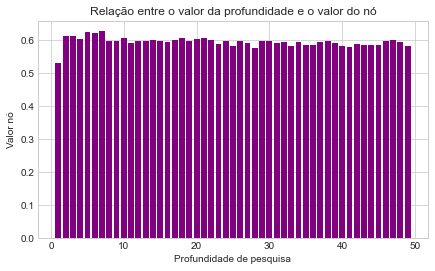

In [121]:
plt.bar(listaj,listavalor2,color="purple",width=0.8)
plt.xlabel("Profundidade de pesquisa")
plt.ylabel("Valor nó")
plt.title("Relação entre o valor da profundidade e o valor do nó")
plt.show()

Quais as variáveis com maior/menor influência:

In [122]:
importance = pd.DataFrame({'feature':dados_train.columns, 'importance':np.round(treegini.feature_importances_,3)})
importance.sort_values('importance',ascending=False , inplace=True)
importance[importance.importance>0]
#9->n_user_reviews
#6->genres
#7->companies
#8->platforms
#3->year
#4->follows
#0->category
#5->in_franchise
#1->n_dlcs
#2->n_expansions

,feature,importance
9,9,0.185
3,3,0.182
4,4,0.151
7,7,0.141
6,6,0.127
8,8,0.097
0,0,0.059
1,1,0.049
2,2,0.005
5,5,0.003


In [123]:
treeentropy=DecisionTreeClassifier(criterion="gini",max_depth=8)
treeentropy.fit(dados_test, destino_test)

importance = pd.DataFrame({'feature':dados_train.columns, 'importance':np.round(treeentropy.feature_importances_,3)})
importance.sort_values('importance',ascending=False , inplace=True)
importance[importance.importance>0]
#9->n_user_reviews
#6->genres
#7->companies
#8->platforms
#3->year
#4->follows
#0->category
#5->in_franchise
#1->n_dlcs
#2->n_expansions

,feature,importance
9,9,0.188
3,3,0.183
4,4,0.145
7,7,0.143
6,6,0.122
8,8,0.095
0,0,0.059
1,1,0.051
5,5,0.009
2,2,0.005


Concluimos que certas categorias podem ser retiradas do dataframe:

In [124]:
dados1 = pd.DataFrame(list(zip(df["category"],df["year"],df["follows"],df["genres"],df["companies"],df["platforms"],df["n_user_reviews"])))
destino1=df["user_rating"]
from sklearn.model_selection import train_test_split
dados1_train,dados1_test,destino1_train,destino1_test=train_test_split(dados1,destino1,random_state=25)

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

valor111 = 0
n=0
for i in range(1,50):
    tree11 = DecisionTreeClassifier(criterion="gini",max_depth=i)
    tree11.fit(dados1_train, destino1_train)
    valor11=tree11.score(dados1_test, destino1_test)
    if valor11>valor111:
        n=i
        valor111 = valor11
print(n)
print(valor111)


valor20 = 0
a=0

for j in range(1,50):
    tree21 = DecisionTreeClassifier(criterion="entropy",max_depth=j)
    tree21.fit(dados1_train, destino1_train)
    valor22=tree21.score(dados1_test, destino1_test)
    if valor22>valor20:
        a=j
        valor20 = valor22
print(a)
print(valor20)

treegini1=DecisionTreeClassifier(criterion="gini",max_depth=a)
treegini1.fit(dados1_test, destino1_test)
previsao_dados1=treegini1.predict(dados1_test)

8
0.6344307270233196
7
0.6241426611796982


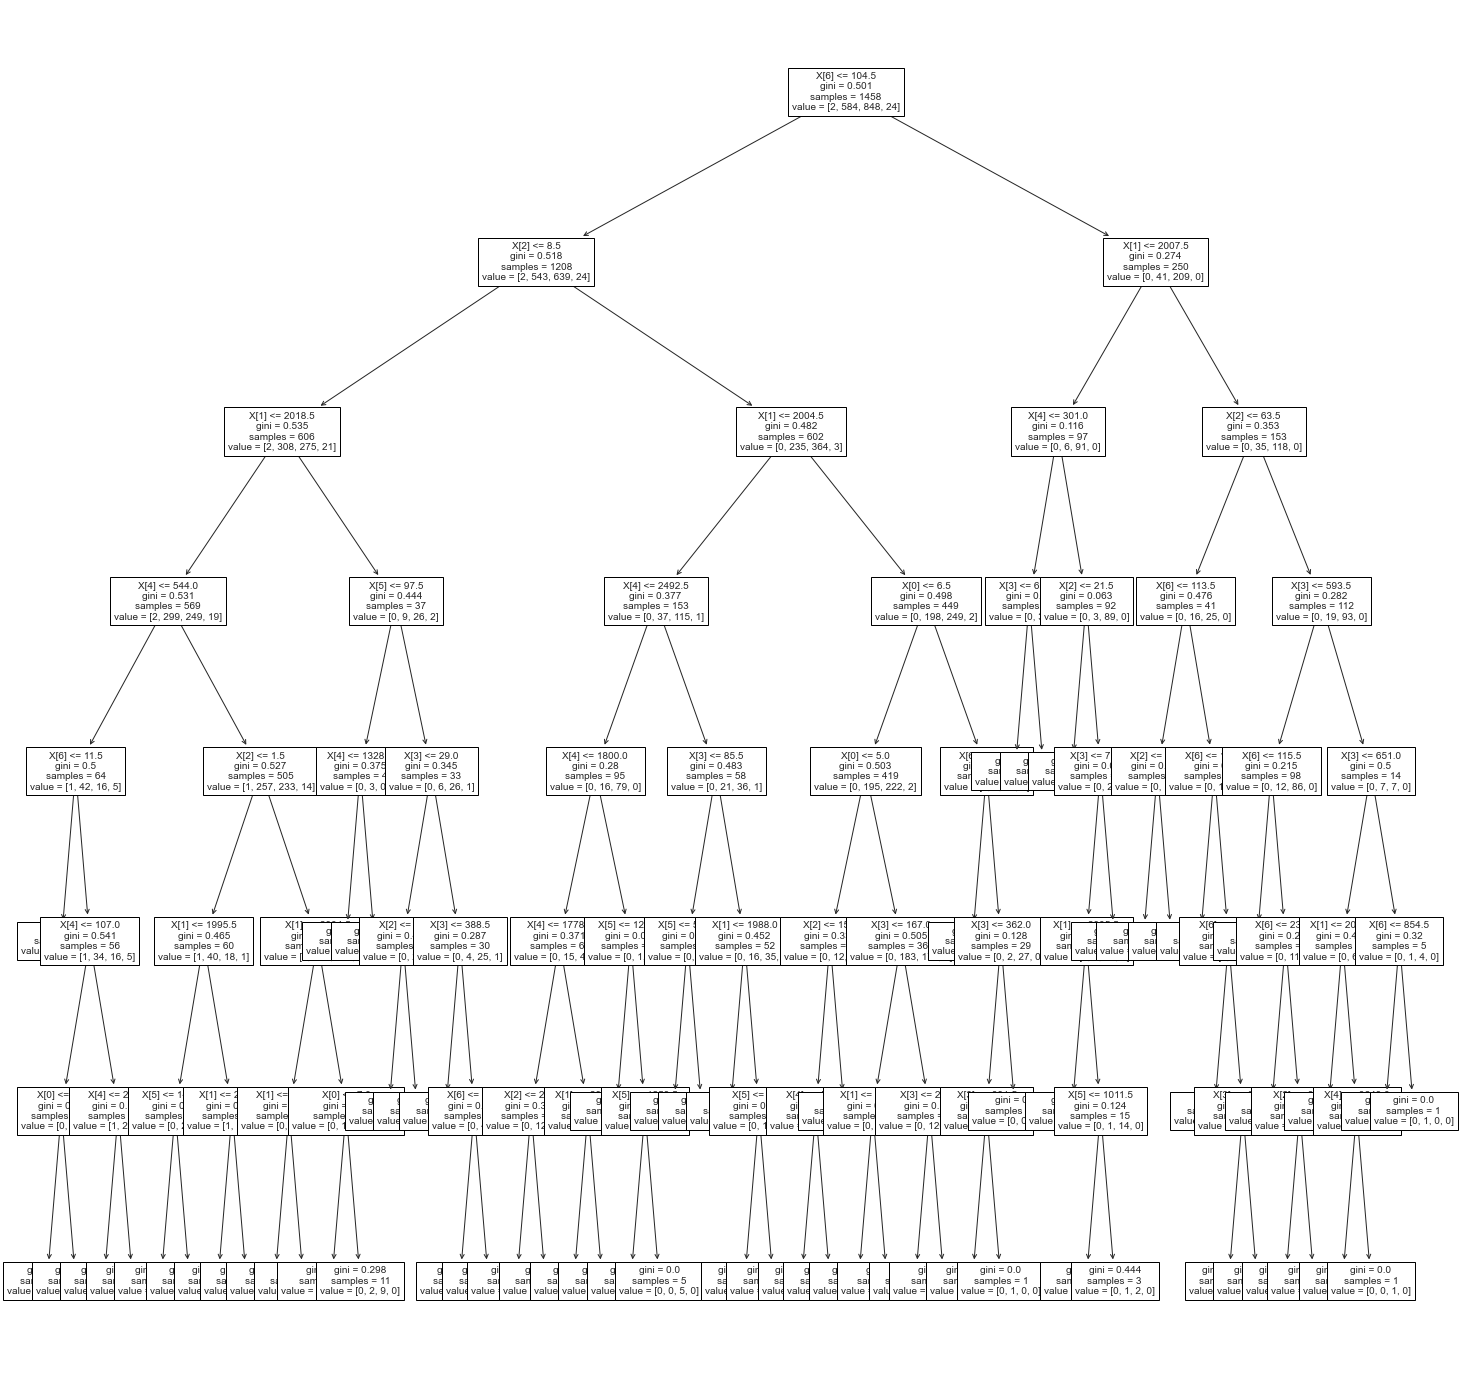

In [125]:
from sklearn import tree
plt.figure(figsize=(25,25))
tree.plot_tree(treegini1,fontsize=10)
plt.show()

Concluimos que o método gini no fornece uma accuracy maior, sendo a diferença ainda maior com as alterações do dataset:

              precision    recall  f1-score   support

         bad       0.00      0.00      0.00         2
        good       0.60      0.79      0.68       584
       great       0.82      0.67      0.74       848
    mediocre       1.00      0.08      0.15        24

    accuracy                           0.71      1458
   macro avg       0.61      0.38      0.39      1458
weighted avg       0.73      0.71      0.70      1458



C:\Users\catar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\catar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\catar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


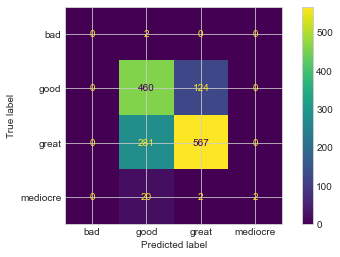

In [126]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


ConfusionMatrixDisplay.from_predictions(destino1_test,previsao_dados1)
print(metrics.classification_report(destino1_test,previsao_dados1))

### K-NN
[voltar ao início](#Índice:)

In [127]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from pylab import rcParams
import urllib
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

19
0.6001371742112482


(array([ 1.,  0.,  0.,  1.,  1.,  3.,  2., 14., 15., 12.]),
 array([0.524 , 0.5316, 0.5392, 0.5468, 0.5545, 0.5621, 0.5697, 0.5773,
        0.5849, 0.5925, 0.6001]),
 <BarContainer object of 10 artists>)

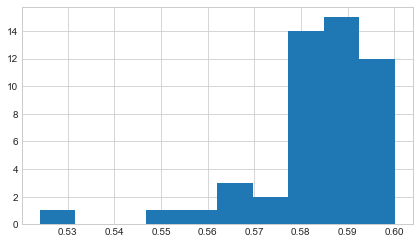

In [128]:
np.set_printoptions(precision=4, suppress= True)
%matplotlib inline
rcParams['figure.figsize']=7,4
plt.style.use('seaborn-whitegrid')

score1=0
listac=[]
listavizinhos=[]
x=0
for c in range (1,50):
    knn2 = KNeighborsClassifier(n_neighbors=c)
    knn2.fit(dados_train, destino_train)
    dados_pred1=knn2.predict(dados_test)
    score2=metrics.accuracy_score(destino_test, dados_pred1)
    listac.append(c)
    listavizinhos.append(score2)
    if score2>score1:
        x=c
        score1=score2
print(x)
print(score1)
plt.hist(listavizinhos)

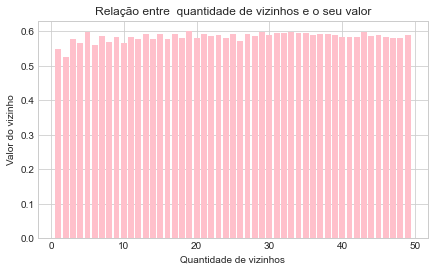

In [129]:
plt.bar(listac,listavizinhos,color="pink",width=0.8)
plt.xlabel("Quantidade de vizinhos")
plt.ylabel("Valor do vizinho")
plt.title("Relação entre  quantidade de vizinhos e o seu valor")
plt.show()

In [130]:
importance = pd.DataFrame({'feature':dados_train.columns, 'importance':np.round(treeentropy.feature_importances_,3)})
importance.sort_values('importance',ascending=False , inplace=True)
importance[importance.importance>0]
#9->n_user_reviews
#6->genres
#7->companies
#8->platforms
#3->year
#4->follows
#0->category
#5->in_franchise
#1->n_dlcs
#2->n_expansions

,feature,importance
9,9,0.188
3,3,0.183
4,4,0.145
7,7,0.143
6,6,0.122
8,8,0.095
0,0,0.059
1,1,0.051
5,5,0.009
2,2,0.005


In [131]:
dados1 = pd.DataFrame(list(zip(df["year"],df["follows"],df["genres"],df["companies"],df["n_user_reviews"])))
destino1=df["user_rating"]
from sklearn.model_selection import train_test_split
dados1_train,dados1_test,destino1_train,destino1_test=train_test_split(dados1,destino1,random_state=25)

score11=0
x=0
for c in range (1,50):
    knn22 = KNeighborsClassifier(n_neighbors=c)
    knn22.fit(dados1_train, destino1_train)
    dados_pred1=knn22.predict(dados1_test)
    score22=metrics.accuracy_score(destino1_test, dados_pred1)
    if score22>score11:
        x=c
        score11=score22
print(x)
print(score11)

29
0.5850480109739369


Após várias tentativas (retirando diversas colunas ao dataset) concluiu-se que com o dataset original o seu valor já era o mais preciso:

              precision    recall  f1-score   support

         bad       0.00      0.00      0.00         2
        good       0.51      0.54      0.53       584
       great       0.66      0.65      0.66       848
    mediocre       0.00      0.00      0.00        24

    accuracy                           0.60      1458
   macro avg       0.29      0.30      0.30      1458
weighted avg       0.59      0.60      0.59      1458



C:\Users\catar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\catar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\catar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


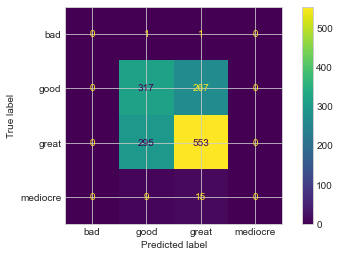

In [132]:
knn19 = KNeighborsClassifier(n_neighbors=x)
knn19.fit(dados_train, destino_train)
score19=knn19.score(dados_test, destino_test)
dados_pred3=knn19.predict(dados_test)

print(metrics.classification_report(destino_test, dados_pred3))
ConfusionMatrixDisplay.from_predictions(destino_test,dados_pred3)

## Passo 4: Comparação de métodos
[voltar ao início](#Índice:)

In [133]:
from tabulate import tabulate
if valor>valor111:
    besttree=valor
else:
    besttree=valor111
if score1>score11:
    bestknn=score1
else:
    bestknn=score11
    
if valor>score1:
    bestbefore=valor
else:
    bestbefore=score1

if valor111>score11:
    bestafter=valor111
else:
    bestafter=score11
    
if besttree>bestknn:
    bestoverall=besttree
else:
    bestoverall=bestknn

table = [['', 'Decision Tree', 'KNN','Best'], ['Before drop',valor ,score1,bestbefore], ['After drop', valor111, score11,bestafter],['Best',besttree,bestknn,bestoverall]]
print(tabulate(table,tablefmt="fancy_grid"))

╒═════════════╤════════════════════╤════════════════════╤════════════════════╕
│             │ Decision Tree      │ KNN                │ Best               │
├─────────────┼────────────────────┼────────────────────┼────────────────────┤
│ Before drop │ 0.6323731138545954 │ 0.6001371742112482 │ 0.6323731138545954 │
├─────────────┼────────────────────┼────────────────────┼────────────────────┤
│ After drop  │ 0.6344307270233196 │ 0.5850480109739369 │ 0.6344307270233196 │
├─────────────┼────────────────────┼────────────────────┼────────────────────┤
│ Best        │ 0.6344307270233196 │ 0.6001371742112482 │ 0.6344307270233196 │
╘═════════════╧════════════════════╧════════════════════╧════════════════════╛


## Conclusão
[voltar ao início](#Índice:)

Concluimos que para este dataset, o modelo de previsão mais adequado foi aferido após a eliminação de atributos do dataset, usando uma Decision Tree com criterion="gini".